# Data Science And Business Analytics Tasks

## Prediction using Supervised ML 

Task : Prediction of the percentage of an student based on the number of study hours

Dataset : http://bit.ly/w-data

What will be the predicted score if a student studies for 9.25 hrs/day ?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

student_data = pd.read_csv('stdnt_score.csv')
print(student_data)

print(student_data.head())
print(student_data.shape)

print(student_data.describe())


    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.5      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
(25, 2)
           Hours     Scores
count  25.000000  25.000000
mean    5.024000  51.480000
std     2.546449  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.500000  95.000000


## Visualization

### Hours vs Percentage of Scores 

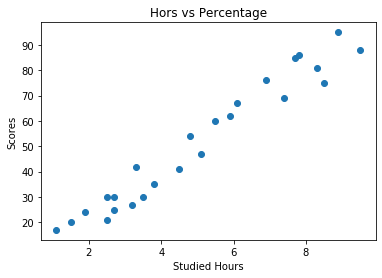

In [2]:
plt.scatter(student_data['Hours'], student_data['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Studied Hours')
plt.ylabel('Scores')
plt.show()

### Train-Test Split 

In [3]:
X = student_data.iloc[:, :-1].values
Y = student_data.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
# Ploting the Regression Line
line = regressor.coef_*X+regressor.intercept_

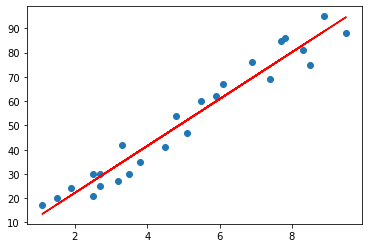

In [5]:
# Ploting for the test data
plt.scatter(X, Y)
plt.plot(X, line, color = 'red');
plt.show()

In [6]:
# Predicting the Test Set Results
y_pred = regressor.predict(X_test)
print(y_pred)


[17.37310547 33.79847993 74.37881684 27.03509045 59.88583937 39.59567092
 21.23789946 78.24361083]


### Visualising the Training Set Results 

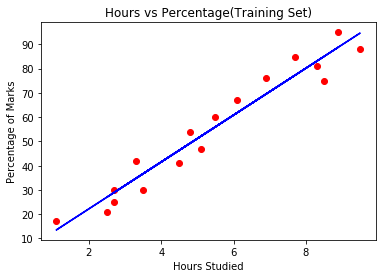

In [13]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Percentage(Training Set)')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage of Marks')
plt.show()

### Visualising the Test Set Rsults 

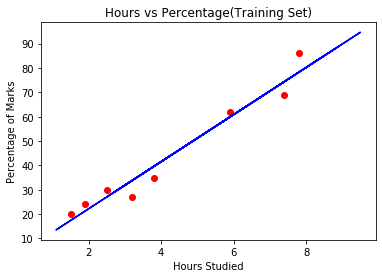

In [14]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs Percentage(Training Set)')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage of Marks')
plt.show()

### Comparing the Actual Values with the Predicted ones 

In [9]:
student_data = pd.DataFrame({'Actual':Y_test, 'Predicted':y_pred})
print(student_data)

   Actual  Predicted
0      20  17.373105
1      27  33.798480
2      69  74.378817
3      30  27.035090
4      62  59.885839
5      35  39.595671
6      24  21.237899
7      86  78.243611


### Predicting the Score 

In [10]:
student_data = np.array(9.25)
student_data = student_data.reshape(-1, 1)
pred = regressor.predict(student_data)
print("If a student studies for 9.25 hours/day, the score is {}.".format(pred))

If a student studies for 9.25 hours/day, the score is [92.25348904].


### Error Metrics 

In [11]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))


Mean Absolute Error: 4.374677763456155


In [12]:
from sklearn.metrics import r2_score
print("The R-Square of the model is: ",r2_score(Y_test, y_pred))

The R-Square of the model is:  0.9567030988677251


### Result 

Using Supervised ML, we got the result that when a student studies 9.25 hours/day, the prediction of percentage score is 92.25348904